# Problem Set 3

## Question 1


Step 1. Import the necessary libraries 

Step 2. Import the dataset from this address (https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user).

Step 3. Assign it to a variable called users

Step 4. Discover what is the mean age per occupation

Step 5. Discover the Male ratio per occupation and sort it from the most to the least

Step 6. For each occupation, calculate the minimum and maximum ages

Step 7. For each combination of occupation and sex, calculate the mean age

Step 8. For each occupation present the percentage of women and men

## Answer 1

In [32]:
# Step 1 Import the libraries
import pandas as pd
import numpy as np

# Step 2:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, sep='|')                     # By using .read_csv I can read data of csv file from a url and assign to a variable called users

# Step 4: 
mean_age_per_occupation = users.groupby('occupation')['age'].mean()                        # first I group data by occupation and then calculate mean age by .mean()
print("Mean age per occupation:")
print(mean_age_per_occupation)

# Step 5:
users['gender_num'] = users['gender'].apply(lambda x: 1 if x == 'M' else 0)                # first I convert gender to a numeric form 1 or 0 by using lambda function
male_ratio_per_occupation = users.groupby('occupation')['gender_num'].mean()               # then I Calculate the ratio of males in each occupation
male_ratio_per_occupation_sorted = male_ratio_per_occupation.sort_values(ascending=False)  # Now sort the result
print("\nMale ratio per occupation (sorted):")
print(male_ratio_per_occupation_sorted)

# Step 6:
min_max_age_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])        # first group the data by occupation and then calculate minimum and maximum ages for each group
print("\nMinimum and maximum ages per occupation:")
print(min_max_age_per_occupation)

# Step 7:
mean_age_per_occupation_gender = users.groupby(['occupation', 'gender'])['age'].mean()    # group the data by both occupation and gender, then calculate the mean age
print("\nMean age per occupation and gender:")
print(mean_age_per_occupation_gender)

# Step 8:
gender_count_per_occupation = users.groupby(['occupation', 'gender']).size().unstack()    # Count the number of men and women in each occupation
gender_count_per_occupation = gender_count_per_occupation.fillna(0)                       # then fill any missing values with 0
gender_percentage_per_occupation = gender_count_per_occupation.div(gender_count_per_occupation.sum(axis=1), axis=0) * 100  # And now I calculate the percentage of men and women 
print("\nPercentage of women and men per occupation:")
print(gender_percentage_per_occupation)

Mean age per occupation:
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Male ratio per occupation (sorted):
occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other      

## Question 2

Step 1. Import the necessary libraries

Step 2. Import the dataset from this address (https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv)

Step 3. Assign it to a variable called euro12

Step 4. Select only the Goal column

Step 5. How many team participated in the Euro2012?

Step 6. What is the number of columns in the dataset?

Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called 
discipline

Step 8. Sort the teams by Red Cards, then to Yellow Cards

Step 9. Calculate the mean Yellow Cards given per Team

Step 10. Filter teams that scored more than 6 goals

Step 11. Select the teams that start with G

Step 12. Select the first 7 columns

Step 13. Select all columns except the last
 3
Step 14. Present only the Shooting Accuracy from England, Italy and Russia

## Answer 2

In [33]:
# Step 1
import pandas as pd

# Step 2:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(url)                                          # Step 3

# Step 4:
goals = euro12['Goals']                                            # Selecting only Goal column

# Step 5:
num_teams = euro12.shape[0]                                        # By checking the number of rows I can count number of teams
print(f"\nNumber of teams participated: {num_teams}")

# Step 6:
num_columns = euro12.shape[1]                                      # Checking the total columns in the dataset
print(f"\nNumber of columns in the dataset: {num_columns}")

# Step 7:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]         # by using [] these brackets I select the desired column and assign them to a new dataframe.
print("\nDiscipline dataframe:")
print(discipline)

# Step 8:
sorted_discipline = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[True, True])    # sort the teams first by Red Cards and then by Yellow Cards.
print("\nTeams sorted by Red and Yellow Cards:")
print(sorted_discipline)

# Step 9:
mean_yellow_cards = discipline['Yellow Cards'].mean()               # calculating the mean of the yellow cards
print(f"\nMean Yellow Cards per team: {mean_yellow_cards}")

# Step 10:
teams_scored_more_than_6 = euro12[euro12['Goals'] > 6]              # filter the team that scored more than 6 goals
print("\nTeams that scored more than 6 goals:")
print(teams_scored_more_than_6)

# Step 11:
teams_start_with_G = euro12[euro12['Team'].str.startswith('G')]     # Select the team that starts with letter G by using str.startwith()
print("\nTeams that start with G:")
print(teams_start_with_G)

# Step 12:
first_7_columns = euro12.iloc[:, :7]                                # Selecting first 7 rows
print("\nFirst 7 columns of the dataset:")                          # reference: https://www.geeksforgeeks.org/how-to-get-first-row-of-pandas-dataframe/
print(first_7_columns)

# Step 13:
all_except_last_3 = euro12.iloc[:, :-3]                             # Selcting all columns except last 3
print("\nAll columns except the last 3:")
print(all_except_last_3)

# Step 14:
shooting_accuracy = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]       # filter the dataset for the teams England, Italy, and Russia and then select only the 'Shooting Accuracy' column
print("\nShooting Accuracy from England, Italy and Russia:")
print(shooting_accuracy)


Number of teams participated: 16

Number of columns in the dataset: 35

Discipline dataframe:
                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0

Teams sorted by Red and Yellow Cards:
                   Team  Yellow C

## Question 3

Housing

Step 1. Import the necessary libraries

Step 2. Create 3 differents Series, each of length 100, as follows:

    • The first a random number from 1 to 4
    • The second a random number from 1 to 3
    • The third a random number from 10,000 to 30,000

Step 3. Create a DataFrame by joinning the Series by column

Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

Step 6. Ops it seems it is going only until index 99. Is it true?

Step 7. Reindex the DataFrame so it goes from 0 to 299

## Answer 3

In [34]:
# Step 3
import pandas as pd
import numpy as np

series1 = pd.Series(np.random.randint(1, 5, size=100))               # Step 2: Create 3 different Series, each of length 100
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

# Step 3:
df = pd.concat([series1, series2, series3], axis=1)                  # joining the Series by column by concat()

# Step 4:   
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']                  # rename the columns by simply assign the new names
print("DataFrame with renamed columns:")
print(df.head())

# Step 5:
bigcolumn = pd.concat([series1, series2, series3], axis=0)           # concatenate the Series into one long Series and then convert it to a DataFrame
bigcolumn = pd.DataFrame(bigcolumn, columns=['bigcolumn'])
print("\nOne-column DataFrame 'bigcolumn':")
print(bigcolumn.head())

# Step 6: 
print("\nLast few rows of 'bigcolumn' DataFrame:")                   # As we see it goes only until index 99
print(bigcolumn.tail())

# Step 7: 
bigcolumn_reindexed = bigcolumn.reset_index(drop=True)               # Resetting the index
bigcolumn_reindexed.index = range(300)
print("\nReindexed 'bigcolumn' DataFrame:")
print(bigcolumn_reindexed)

DataFrame with renamed columns:
   bedrs  bathrs  price_sqr_meter
0      2       1            29687
1      2       3            19680
2      1       1            23248
3      1       1            20444
4      3       3            24926

One-column DataFrame 'bigcolumn':
   bigcolumn
0          2
1          2
2          1
3          1
4          3

Last few rows of 'bigcolumn' DataFrame:
    bigcolumn
95      13030
96      28229
97      28082
98      14581
99      27032

Reindexed 'bigcolumn' DataFrame:
     bigcolumn
0            2
1            2
2            1
3            1
4            3
..         ...
295      13030
296      28229
297      28082
298      14581
299      27032

[300 rows x 1 columns]


## Question 4

Wind Statistics
The data have been modified to contain some missing values, identified by NaN.Using pandas should make this exercise easier, in particular for the bonus question.You should be able to perform all of these operations without using a for loop or other looping constr

The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.

Step 1. Import the necessary libraries

Step 2. Import the dataset from the attached file wind.txt

Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

Step 7. Compute how many non-missing values there are in total.

Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.A single number for the entire dataset.

Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the daysA different set of numbers for each location.

Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
A different set of numbers for each day.

Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.

Step 12. Downsample the record to a yearly frequency for each location.

Step 13. Downsample the record to a monthly frequency for each location.

Step 14. Downsample the record to a weekly frequency for each location.

Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.uctthe first 52 weeks.uct

## Answer 4

In [43]:
# Step 1
import pandas as pd
import numpy as np

# Step 2:
data = pd.read_csv('wind.txt', delim_whitespace=True, header=0)
data.columns = ['Yr', 'Mo', 'Dy', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB', 'CLA', 'MUL', 'CLO', 'BEL', 'MAL']

# Step 3:
data['Date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')      # convert the first three columns to a datetime index and combine them
data = data.drop(columns=['Yr', 'Mo', 'Dy'])                      # Delete the first 3 columns
data = data.set_index('Date')                                     # make 1 coloumn which has a combine datetime of all 3 columns
print(data.head())

# Step 4:
def fix_year(x):                                                  # make a function to correct the year
    year = x.year - 100 if x.year > 2000 else x.year              # if year is greater than 2000 then it is subtracted by 100 otherwise print year
    return pd.Timestamp(year=year, month=x.month, day=x.day)

data.index = data.index.to_series().apply(fix_year)
print(data.head())

# Step 5:
data.index = pd.to_datetime(data.index)
print(data.index.dtype)

# Step 6: 
missing_values = data.isnull().sum()                              # calculates how many null values are there
print("Missing values for each location:")
print(missing_values)

# Step 7: 
non_missing_values = data.notnull().sum().sum()                   # calculate how many non-missing values are present
print(f"\nTotal non-missing values: {non_missing_values}")

# Step 8: 
mean_windspeed = data.mean().mean()                               # mean of overall windspeeds
print(f"\nMean windspeed over all locations and times: {mean_windspeed}")

# Step 9: 
loc_data = data.describe().loc[['min', 'max', 'mean', 'std']]     # create datframe with given statistics for each location
print("\nLocation statistics:")
print(loc_data)

# Step 10:
day_data = data.T.describe().loc[['min', 'max', 'mean', 'std']].T
print("\nDay statistics:")
print(day_data.head())

# Step 11:
january_data = data[data.index.month == 1]                        # first select only the january month
january_avg = january_data.mean()                                 # then calculate the mean 
print("\nAverage windspeed in January for each location:")
print(january_avg)

# Step 12: 
yearly_data = data.resample('A').mean()                           # Downsample the record to a yearly frequency
print("\nYearly frequency data:")
print(yearly_data)

# Step 13:  
monthly_data = data.resample('M').mean()                          #  Downsample the record to a monthly frequency
print("\nMonthly frequency data:")
print(monthly_data)

# Step 14: 
weekly_data = data.resample('W').mean()                           # Downsample the record to a weekly frequency
print("\nWeekly frequency data:")
print(weekly_data)

# Step 15:
weekly_stats = data.resample('W').agg(['min', 'max', 'mean', 'std']).iloc[:52]
print("\nWeekly statistics for the first 52 weeks:")
print(weekly_stats)

              RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
Date                                                                       
2061-01-01  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
2061-01-02  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
2061-01-03  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
2061-01-04  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
2061-01-05  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   

              CLO    BEL    MAL  
Date                             
2061-01-01  12.58  18.50  15.04  
2061-01-02   9.67  17.54  13.83  
2061-01-03   7.67  12.75  12.71  
2061-01-04   5.88   5.46  10.88  
2061-01-05  10.34  12.92  11.83  
              RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
Date                                                                       
1961-01-01  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
1

## Question 5

Step 1. Import the necessary libraries

Step 2. Import the dataset from this address (https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

Step 3. Assign it to a variable called chipo.

Step 4. See the first 10 entries

Step 5. What is the number of observations in the dataset?

Step 6. What is the number of columns in the dataset?

Step 7. Print the name of all the columns.

Step 8. How is the dataset indexed?

Step 9. Which was the most-ordered item?

Step 10. For the most-ordered item, how many items were ordered?

Step 11. What was the most ordered item in the choice_description column?

Step 12. How many items were orderd in total?

Step 13.
    
    • Turn the item price into a float
    • Check the item price type
    • Create a lambda function and change the type of item price
    • Check the item price type

Step 14. How much was the revenue for the period in the dataset?

Step 15. How many orders were made in the period?

Step 16. What is the average revenue amount per order?

Step 17. How many different items are sold?

## Answer 5

In [36]:
#step 1
import pandas as pd

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'  
chipo = pd.read_csv(url, sep='\t')                               # Step 2 and 3

print(chipo.head(10))                                            # Step 4: first 10 rows

num_observations = chipo.shape[0]                                # Step 5: Number of observations by looking no. of rows
print(f"Number of observations: {num_observations}")

num_columns = chipo.shape[1]                                     # Step 6: Number of columns
print(f"Number of columns: {num_columns}")
 
print("Column names:")                                           # Step 7: Column names
print(chipo.columns)

print("Indexing information:")                                   # Step 8: Index of dataset
print(chipo.index)

most_ordered_item = chipo['item_name'].value_counts().idxmax()   # Step 9: Most-ordered item by looking maximum no. of order id
print(f"Most-ordered item: {most_ordered_item}")

most_ordered_item_count = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()    # Step 10: calculate the number of most-ordered items
print(f"Number of {most_ordered_item} ordered: {most_ordered_item_count}")

most_ordered_choice_description = chipo['choice_description'].value_counts().idxmax()         # Step 11: Most ordered item in the choice_description column
print(f"Most ordered item in choice_description: {most_ordered_choice_description}")

total_items_ordered = chipo['quantity'].sum()                               # Step 12: calculate the total items ordered
print(f"Total items ordered: {total_items_ordered}")

chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))     # Step 13: Turn the item price into a float and check the type
print(f"Item price type after conversion: {chipo['item_price'].dtype}")

revenue = (chipo['quantity'] * chipo['item_price']).sum()                   # Step 14: calculate the total revenue
print(f"Total revenue: ${revenue:.2f}")

total_orders = chipo['order_id'].nunique()                                  # Step 15: Total orders by calculating unique order id number
print(f"Total orders: {total_orders}")

revenue_per_order = chipo.groupby('order_id').sum()['item_price'].mean()    # Step 16: Average revenue per order by first grouping sum of order id and then mean of item price
print(f"Average revenue per order: ${revenue_per_order:.2f}")

different_items_sold = chipo['item_name'].nunique()                         # Step 17: calculate the number of different items sold
print(f"Different items sold: {different_items_sold}")

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

## Question 6

Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

## Answer 6

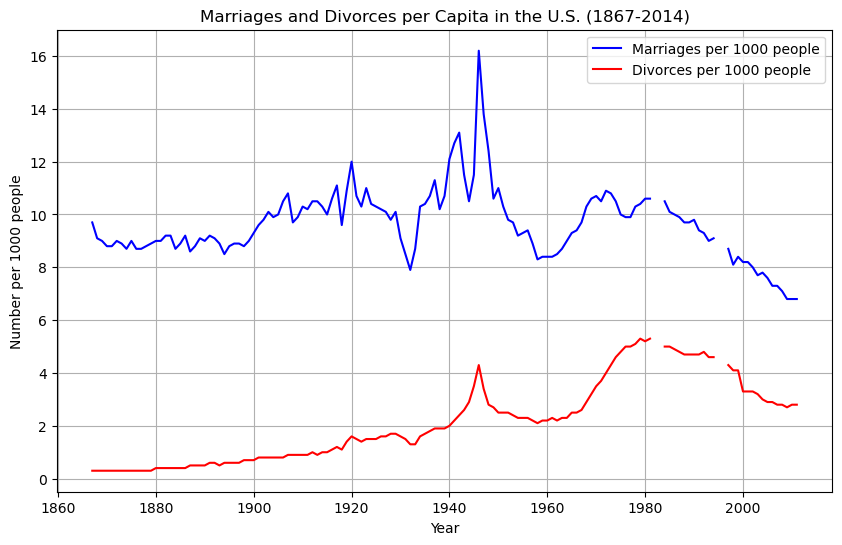

In [37]:
import pandas as pd                                          
import matplotlib.pyplot as plt

file_path = 'us-marriages-divorces-1867-2014.csv'            
data = pd.read_csv(file_path)

plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per 1000 people', color='blue')         # number of marriages per capita
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per 1000 people', color='red')            # number of divorces per capita
plt.xlabel('Year')                                                                                          # Label the axes
plt.ylabel('Number per 1000 people')
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.legend()                                                                                                # Show the legend

plt.grid(True)                                                                                              # to show the grid of the graph
plt.show()

## Question 7

Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.Don't forget to label your axes!

## Answer 7

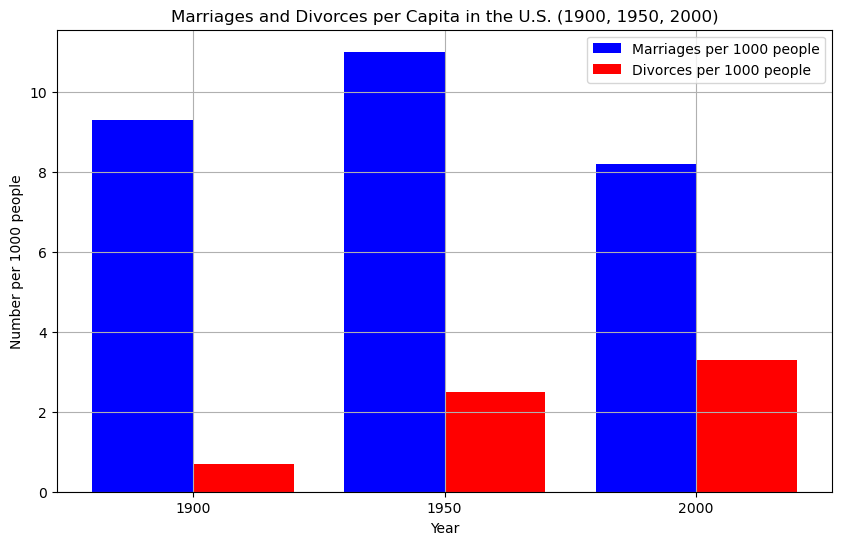

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'us-marriages-divorces-1867-2014.csv'
data = pd.read_csv(file_path)

filtered_data = data[data['Year'].isin([1900, 1950, 2000])]             # Filter data for the years 1900, 1950, and 2000

positions = list(range(len(filtered_data)))                             # Set the positions and width for the bars
width = 0.4

fig, ax = plt.subplots(figsize=(10, 6))                                 # to specify the dimensions of the figure
bars1 = ax.bar(positions, filtered_data['Marriages_per_1000'], width, label='Marriages per 1000 people', color='blue')
bars2 = ax.bar([p + width for p in positions], filtered_data['Divorces_per_1000'], width, label='Divorces per 1000 people', color='red')

ax.set_xticks([p + width/2 for p in positions])                         # Set the position of the x ticks,by doing this I can set x ticks as years
ax.set_xticklabels(filtered_data['Year'])

plt.xlabel('Year')
plt.ylabel('Number per 1000 people')
plt.title('Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
plt.legend()
plt.grid(True)
plt.show()

## Question 8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

## Answer 8

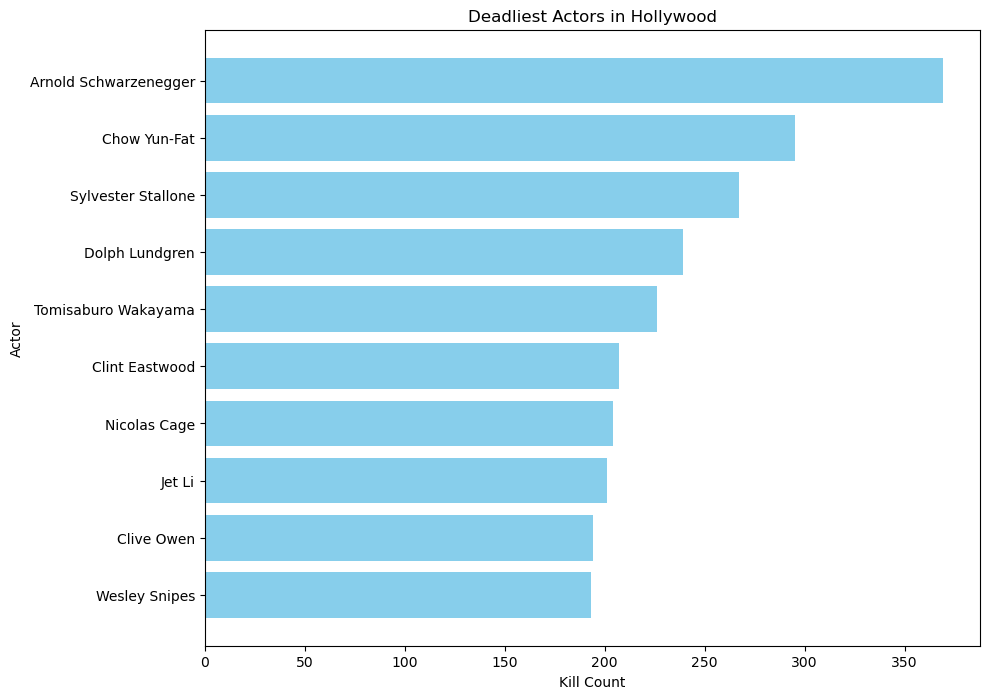

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'actor_kill_counts.csv'
data = pd.read_csv(file_path)

data = data.sort_values(by='Count', ascending=False)         # Sort the data by kill count

plt.figure(figsize=(10, 8))                                 
plt.barh(data['Actor'], data['Count'], color='skyblue')
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')
plt.gca().invert_yaxis()                                     # Invert y-axis to have the actor with the highest kills at the top
plt.show()

## Question 9

Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

## Answer 9

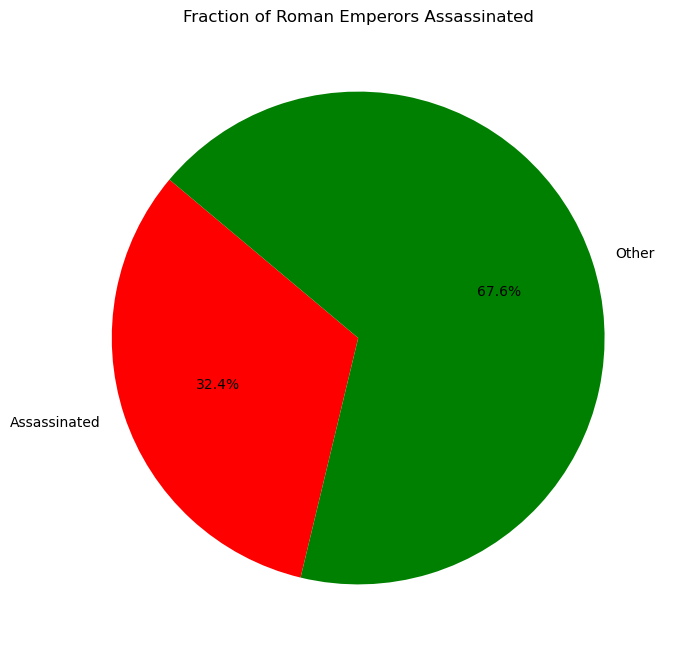

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'roman-emperor-reigns.csv'
data = pd.read_csv(file_path)

number_of_assassinated = data[data['Cause_of_Death'] == 'Assassinated'].shape[0]    # filter the number of emperors that were assassinated
total_emperors = data.shape[0]                                                      # total number of emperors

assassinated_fraction = number_of_assassinated / total_emperors                     # Calculate the fraction of emperors that were assassinated
other_fraction = 1 - assassinated_fraction

plt.figure(figsize=(8, 8))
fractions = [assassinated_fraction, other_fraction]
labels = ['Assassinated', 'Other']
plt.pie(fractions, labels=labels, autopct='%1.1f%%', startangle=140, colors=['red', 'green'])
plt.title('Fraction of Roman Emperors Assassinated')
plt.show()

## Question 10

Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

## Answer 10

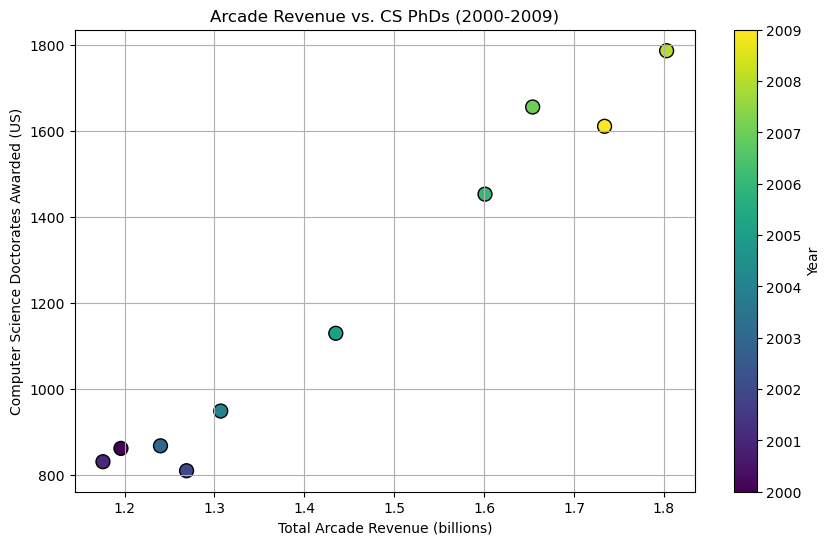

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'arcade-revenue-vs-cs-doctorates.csv'
data = pd.read_csv(file_path)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['Total Arcade Revenue (billions)'], 
                      data['Computer Science Doctorates Awarded (US)'], 
                      c=data['Year'], cmap='viridis', edgecolor='k', s=100)        # Scatter plot with color mapping by year      

plt.xlabel('Total Arcade Revenue (billions)')                                      # Label the axes
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Arcade Revenue vs. CS PhDs (2000-2009)')

colorbar = plt.colorbar(scatter)                                                   # Add a color bar
colorbar.set_label('Year')
plt.grid(True)
plt.show()